In [1]:
from DataReader import DataReader

dr = DataReader(hours=9)
X,y = dr.data()

In [2]:
import numpy as np

In [3]:
X = np.concatenate((X,(X**2),(X**3)),axis=1)

In [4]:
def normal(X):
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    X_norm = (X-mu)/std
    return X_norm,mu,std

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)
X_train_norm,mu,std = normal(X_train)
X_test_norm = (X_test-mu)/std

In [6]:
from LinearRegressionModel import LinearRegreesionModel

In [7]:
model = LinearRegreesionModel(lr=0.01,lbd=100,epoches=10000)
model.fit(X_train_norm,y_train,X_test_norm,y_test)
train_loss_history,test_loss_history,grad_history = model.history()

epoch:1000 train loss:19.389069315363326 test loss:21.98845508606931
epoch:2000 train loss:18.960403030715085 test loss:22.023039944313407
epoch:3000 train loss:18.87540432563106 test loss:22.071372155356887
epoch:4000 train loss:18.851186360306787 test loss:22.06185021567684
epoch:5000 train loss:18.84300281305395 test loss:22.036674625480003
epoch:6000 train loss:18.83998896105535 test loss:22.012680348367137
epoch:7000 train loss:18.838825561937217 test loss:21.99393963323189
epoch:8000 train loss:18.838363179111056 test loss:21.980396998999684
epoch:9000 train loss:18.838175583815143 test loss:21.97097716075732
epoch:10000 train loss:18.83809823216843 test loss:21.964562746710595


(18.83809818382933, 21.964557514130426)

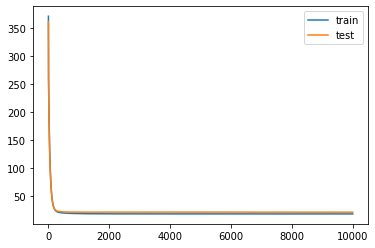

In [8]:
import matplotlib.pyplot as plt
plt.plot(train_loss_history)
plt.plot(test_loss_history)
plt.legend(['train','test'])

train_loss_history[-1],test_loss_history[-1]